In [227]:
# %%
import matplotlib.pyplot as plt

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

- 2가지 구성 요소
    1. Figure: 틀
    2. Axes
        - Figure 바로 하위에서 실제 그래프가 그려질 공간
        - 실제로 가장 많이 핸들링 하게 될 요소이며, 이 안에 각종 plotting components가 존재

## Matplotlib의 2가지 interface

1. Stateful
2. Stateless

In [228]:
import FinanceDataReader as fdr

samsung_df = fdr.DataReader('005930', '2017-01-01', '2017-12-31')
samsung_df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665
2017-01-03,36280,36620,36020,36480,147153,0.010526
2017-01-04,36500,36520,36100,36160,159435,-0.008772
2017-01-05,36060,36060,35540,35560,219349,-0.016593
2017-01-06,36180,36440,36040,36200,177619,0.017998
...,...,...,...,...,...,...
2017-12-21,51000,51060,49100,49140,312486,-0.034198
2017-12-22,49400,49960,49240,49700,223993,0.011396
2017-12-26,49760,50100,48200,48200,320797,-0.030181


### Stateful

- Matplotlib이 암묵적으로 현재 상태를 들고 있음
    - 내부적으로 현재 타겟이 되는 figure, ax 등을 설정하고, operation이 발생하면 '내부에서' 해당 figure, ax에 적용함
- 권장하지 않음
    - matplotlib이 암묵적, 내부적으로 변화를 진행하고 적용하기 때문에 직관적이지 않음
    - 다수의 plot을 한 번에 그리기 어려움
    - 간단히 테스트 할 경우 사용하는 것을 권장

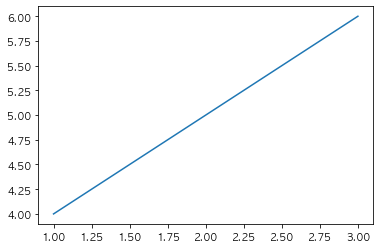

In [229]:
x = [1, 2, 3]
y = [4, 5, 6]
plt.plot(x, y)
# plt.show()
# `%matplotlib inline` 사용해서 생략 가능

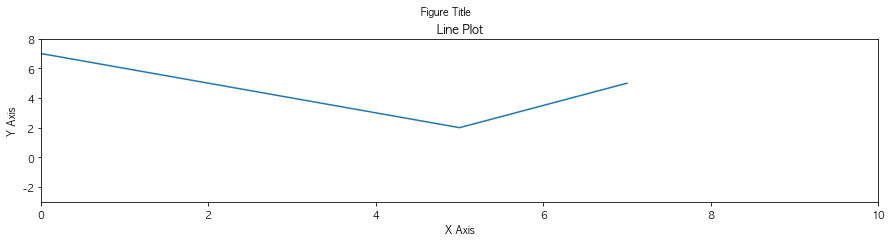

In [230]:
x = [-3, 5, 7]
y = [10, 2, 5]

# InteractiveShell.ast_node_interactivity = 'all'
# 위 설정이 되어있더라도 라인 끝에 세미콜론을 붙일 경우 내용이 출력되지 않음
plt.figure(figsize=(15, 3));
plt.plot(x, y);
plt.xlim(0, 10);
plt.ylim(-3, 8);
plt.xlabel('X Axis');
plt.ylabel('Y Axis');
plt.title('Line Plot');
plt.suptitle('Figure Title', size=10, y=1.03);

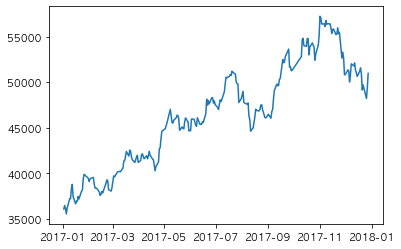

In [231]:
plt.plot(samsung_df.index, samsung_df['Close']);

### Stateless - Object Oriented

- Matplotlib의 각 component를 하나의 object로 받아서 함수 실행 및 property 설정/변경
    - figure, ax(es)를 먼저 생성한 다음 하나하나 더하고 적용하는 방법
- 적용과정이 명시적으로 코드로 드러나기 때문에 조금 더 직관적임

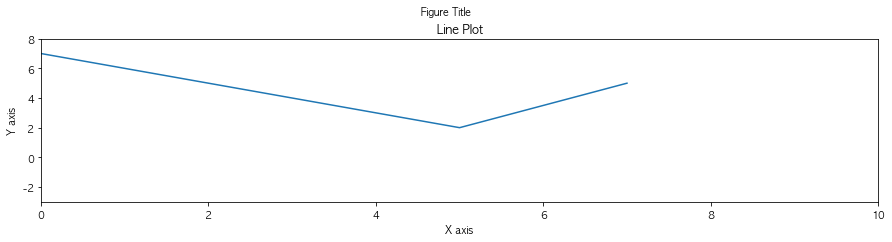

In [232]:
x = [-3, 5, 7]
y = [10, 2, 5]

fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(x, y);
ax.set_xlim(0, 10);
ax.set_ylim(-3, 8);
ax.set_xlabel('X axis');
ax.set_ylabel('Y axis');
ax.set_title('Line Plot');
fig.suptitle('Figure Title', size=10, y=1.03);

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

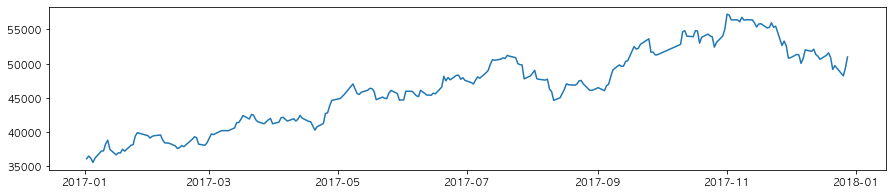

In [233]:
fig, ax = plt.subplots(figsize=(15, 3))

type(fig), type(ax)
ax.plot(samsung_df.index, samsung_df['Close'])

## Matplotlib 들여다보기

`figure` & `axes`

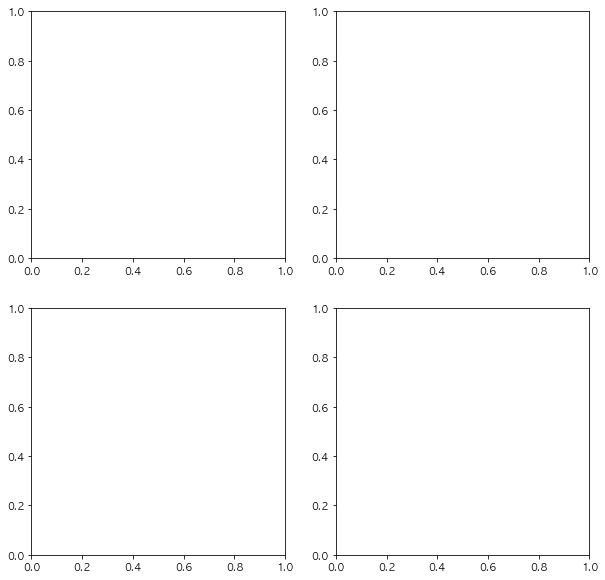

In [234]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

In [235]:
type(fig)
type(axes), axes # NUMPY ARRAY ?!

matplotlib.figure.Figure

(numpy.ndarray,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

In [236]:
axes[0][0]

<AxesSubplot:>

#### Children of axes

- `spines`: axes를 둘러싸고 있는 border
- `axis`: x, y 축. tick, label 등을 들고 있음

In [237]:
axes[0][0].get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

In [238]:
ax = axes[0][0]

In [239]:
ax.xaxis
ax.get_xaxis()
ax.xaxis == ax.get_xaxis()

True

In [240]:
data = fdr.DataReader('005930', '2019-01-01', '2019-12-31')
close_series = data['Close']
volume_series = data['Volume']

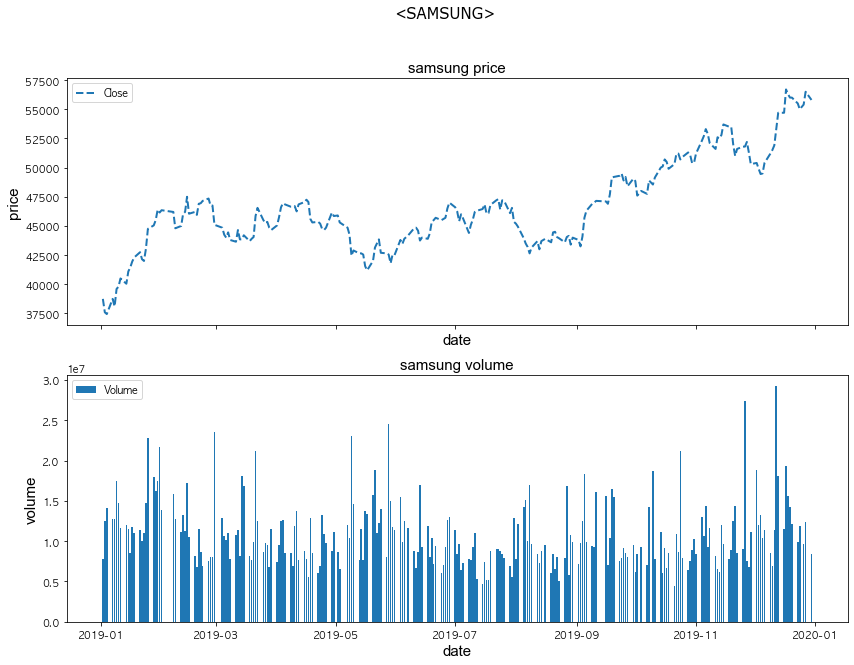

In [241]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

ax1 = axes[0]
ax2 = axes[1]

ax1.plot(close_series.index, close_series, linewidth=2, linestyle='--', label='Close')
ax1.set_title('samsung price', fontsize=15, family='Arial')
ax1.set_ylabel('price', fontsize=15, family='Arial')
ax1.set_xlabel('date', fontsize=15, family='Arial')
ax1.legend(loc='upper left')

# ax2.plot(kind='bar')
ax2.bar(volume_series.index, volume_series, label='Volume')
ax2.set_title('samsung volume', fontsize=15, family='Arial')
ax2.set_ylabel('volume', fontsize=15, family='Arial')
ax2.set_xlabel('date', fontsize=15, family='Arial')
ax2.legend(loc='upper left')

fig.suptitle("<SAMSUNG>", fontsize=15, family='Verdana');

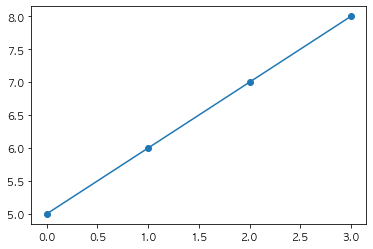

In [242]:
f, a = plt.subplots()
a.plot([5, 6, 7, 8], marker='o');

## Plotting with Pandas

- DataFrame, Series는 `plot()`을 호출하면, 내부적으로 matplotlib api를 호출함
- plot을 실행한 후 ax를 return
- matplotlib arg는 그대로 전달 가능
- plot의 종류(`kind` arg)
    - `bar`, `line`, `scatter`, etc.
    - `hist`, `box`, etc.

In [243]:
samsung_series = fdr.DataReader('005930', '2017-01-01', '2018-01-01')['Close']
kodex_series = fdr.DataReader('069500', '2017-01-01', '2018-01-01')['Close']

import pandas as pd
price_df = pd.concat([samsung_series, kodex_series], axis=1)
price_df.columns = ['삼성전자', 'KODEX200']
price_df

,삼성전자,KODEX200
Date,,
2017-01-02,36100,23451
2017-01-03,36480,23638
2017-01-04,36160,23665
2017-01-05,35560,23572
2017-01-06,36200,23673
...,...,...
2017-12-21,49140,28976
2017-12-22,49700,29115
2017-12-26,48200,28997


In [244]:
price_max_df = price_df.groupby(price_df.index.month).max() # 월봉의 high_price
price_max_df

,삼성전자,KODEX200
Date,,
1,39900,24316
2,39560,24547
3,42560,25512
4,44620,25945
5,47020,27816
6,48300,28360
7,51200,29176
8,49000,28812
9,53620,28872


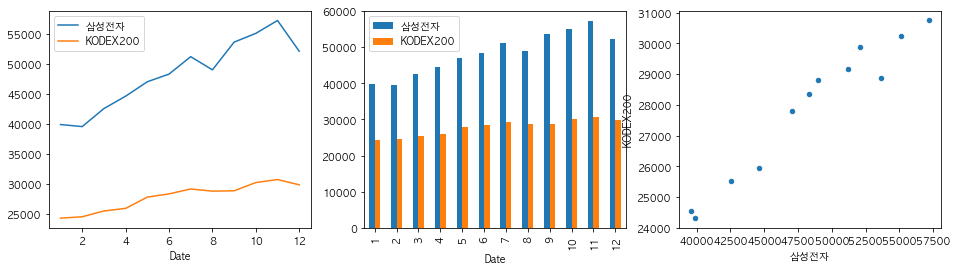

In [245]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))

price_max_df.plot(ax=ax1, kind='line');
price_max_df.plot(ax=ax2, kind='bar');
price_max_df.plot(ax=ax3, x='삼성전자', y='KODEX200', kind='scatter');

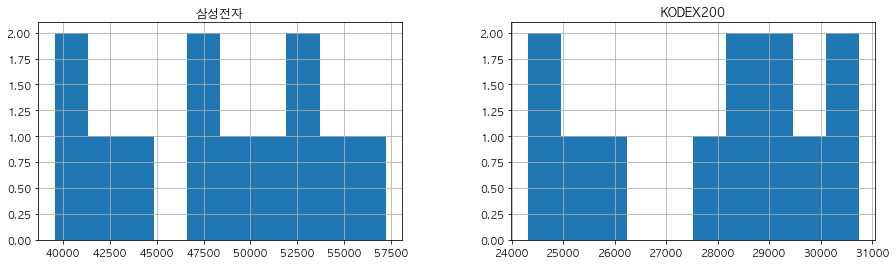

In [246]:
price_max_df.hist(figsize=(15, 4));

In [247]:
price_df.pct_change() # percent change, 수익률 계산 => p2 / p1 - 1

,삼성전자,KODEX200
Date,,
2017-01-02,NaN,NaN
2017-01-03,0.010526,0.007974
2017-01-04,-0.008772,0.001142
2017-01-05,-0.016593,-0.003930
2017-01-06,0.017998,0.004285
...,...,...
2017-12-21,-0.034198,-0.019458
2017-12-22,0.011396,0.004797
2017-12-26,-0.030181,-0.004053


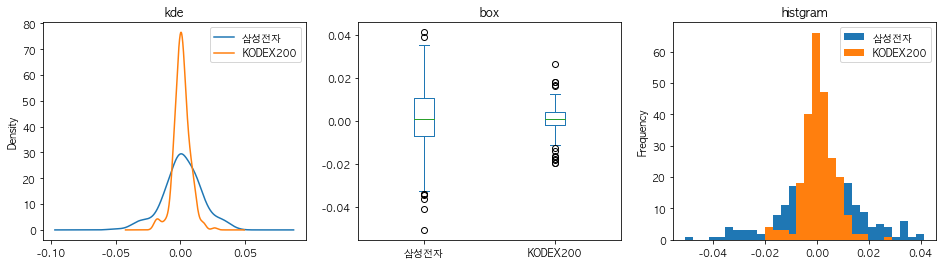

In [248]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

price_df.pct_change().plot(kind='kde', ax=ax1, title='kde');
price_df.pct_change().plot(kind='box', ax=ax2, title='box');
price_df.pct_change().plot(kind='hist', ax=ax3, title='histgram', bins=30);

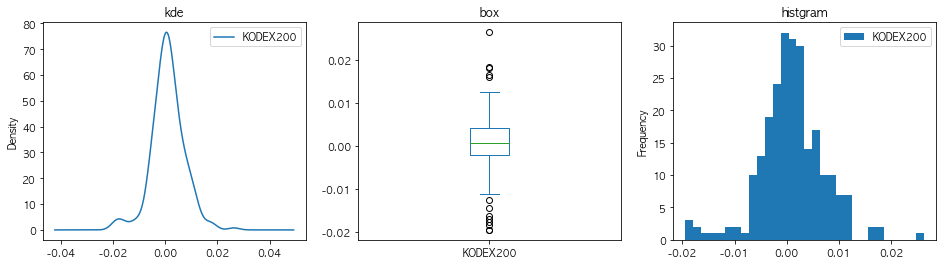

In [249]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

price_df.pct_change().plot(x='삼성전자', kind='kde', ax=ax1, title='kde');
price_df.pct_change().plot(x='삼성전자', kind='box', ax=ax2, title='box');
price_df.pct_change().plot(x='삼성전자', kind='hist', ax=ax3, title='histgram', bins=30);

In [250]:
# matplotlib korean setting
import matplotlib.font_manager as fm
import matplotlib as mpl

[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Gothic' in f.name]
plt.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] = False

[('Hiragino Maru Gothic Pro', '/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc'),
 ('Apple SD Gothic Neo', '/System/Library/Fonts/AppleSDGothicNeo.ttc'),
 ('Noto Sans Gothic',
  '/System/Library/Fonts/Supplemental/NotoSansGothic-Regular.ttf'),
 ('AppleGothic', '/System/Library/Fonts/Supplemental/AppleGothic.ttf')]

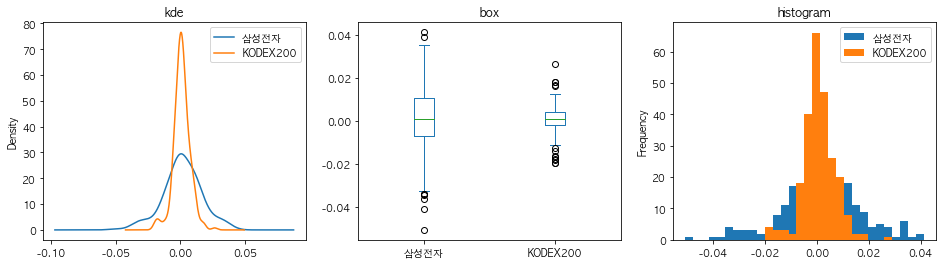

In [251]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

price_df.pct_change().plot(kind='kde', ax=ax1, title='kde')
price_df.pct_change().plot(kind='box', ax=ax2, title='box')
price_df.pct_change().plot(kind='hist', ax=ax3, title='histogram', bins=30);

In [252]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [253]:
import seaborn as sns
from initializer import CSV_BASE_DIR

df = pd.read_csv(f'{CSV_BASE_DIR}/Small_and_Big.csv', index_col=0, parse_dates=['date'])
df

,date,종목명,PBR(IFRS-연결),"베타 (M,5Yr)",수익률(%),시가총액 (보통)(평균)(원)
0,2000-07-31,BYC,0.21,0.47940,-0.58,2.778600e+10
1,2000-07-31,CJ,0.51,1.16611,-9.00,1.160889e+12
2,2000-07-31,CJ ENM,6.56,NaN,17.40,4.004670e+11
3,2000-07-31,CJ대한통운,0.17,1.31374,-7.96,1.949620e+11
4,2000-07-31,CJ씨푸드,NaN,0.22678,32.00,1.987000e+09
...,...,...,...,...,...,...
235924,2018-06-30,흥국에프엔비,0.95,1.36392,-1.69,6.492600e+10
235925,2018-06-30,흥국화재,0.65,0.72064,8.89,3.831750e+11
235926,2018-06-30,흥아해운,0.92,1.24047,-5.75,1.344730e+11
235927,2018-06-30,희림,1.39,0.21584,2.23,8.625000e+10


In [254]:
median_df = df.groupby(['date']).agg({'시가총액 (보통)(평균)(원)': 'median'})
median_df.columns = ['median_시가총액']
median_df

,median_시가총액
date,
2000-07-31,3.494700e+10
2000-08-31,3.368400e+10
2000-09-30,3.368400e+10
2000-10-31,3.052300e+10
2000-11-30,3.079800e+10
...,...
2018-02-28,1.556640e+11
2018-03-31,1.556640e+11
2018-04-30,1.595500e+11


In [255]:
df = df.join(median_df, on='date')
df.loc[df['시가총액 (보통)(평균)(원)'] < df['median_시가총액'], 'size'] = 'small'
df.loc[df['시가총액 (보통)(평균)(원)'] >= df['median_시가총액'], 'size'] = 'big'
df

,date,종목명,PBR(IFRS-연결),"베타 (M,5Yr)",수익률(%),시가총액 (보통)(평균)(원),median_시가총액,size
0,2000-07-31,BYC,0.21,0.47940,-0.58,2.778600e+10,3.494700e+10,small
1,2000-07-31,CJ,0.51,1.16611,-9.00,1.160889e+12,3.494700e+10,big
2,2000-07-31,CJ ENM,6.56,NaN,17.40,4.004670e+11,3.494700e+10,big
3,2000-07-31,CJ대한통운,0.17,1.31374,-7.96,1.949620e+11,3.494700e+10,big
4,2000-07-31,CJ씨푸드,NaN,0.22678,32.00,1.987000e+09,3.494700e+10,small
...,...,...,...,...,...,...,...,...
235924,2018-06-30,흥국에프엔비,0.95,1.36392,-1.69,6.492600e+10,1.646500e+11,small
235925,2018-06-30,흥국화재,0.65,0.72064,8.89,3.831750e+11,1.646500e+11,big
235926,2018-06-30,흥아해운,0.92,1.24047,-5.75,1.344730e+11,1.646500e+11,small
235927,2018-06-30,희림,1.39,0.21584,2.23,8.625000e+10,1.646500e+11,small


### Count Plot

big      118022
small    117907
Name: size, dtype: int64

<AxesSubplot:>

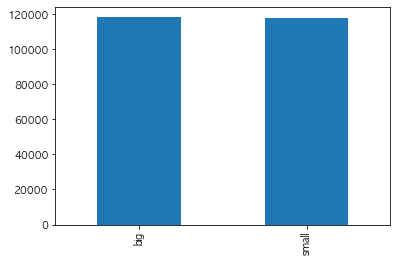

In [256]:
# matplotlib version
df['size'].value_counts()
df['size'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='size', ylabel='count'>

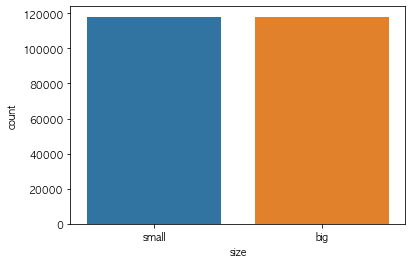

In [257]:
# seaborn version
sns.countplot(x='size', data=df)

### 수익률 Bar Plot

In [258]:
df['date'] = df['date'].dt.strftime('%Y-%m-%d') # datetime, strftime, strptime

date
2000-07-31    -6.384293
2000-08-31     9.991885
2000-09-30     9.991885
2000-10-31   -12.142265
2000-11-30     3.781980
                ...    
2018-02-28    -3.717437
2018-03-31    -3.717437
2018-04-30     6.084928
2018-05-31     1.050753
2018-06-30     1.050753
Name: 수익률(%), Length: 216, dtype: float64

<AxesSubplot:xlabel='date'>

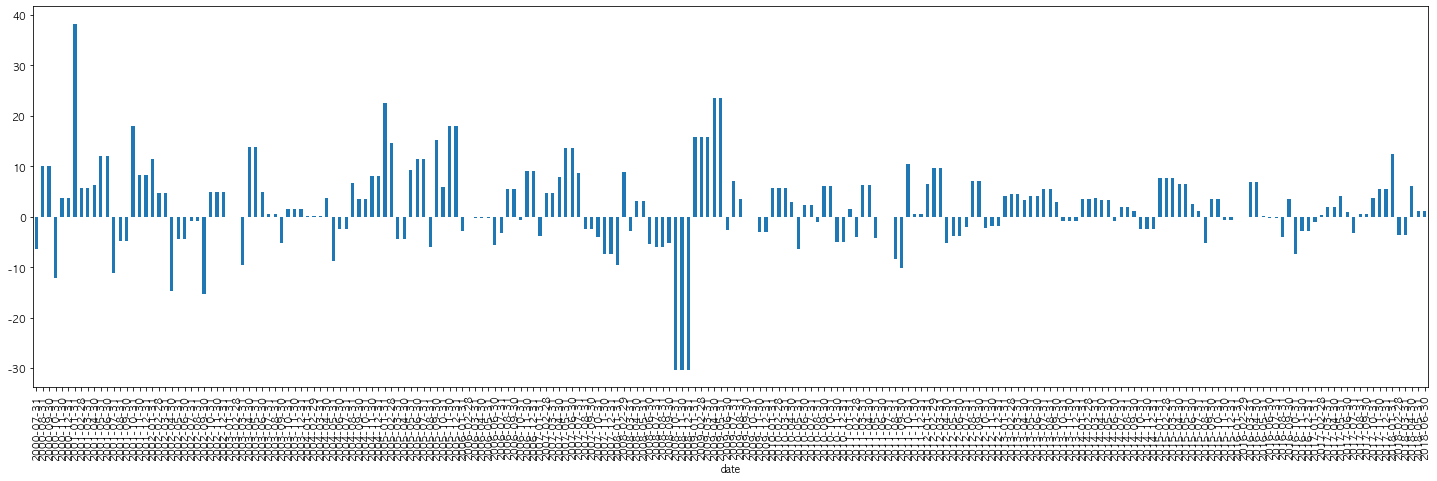

In [259]:
# matplotlib version
df.groupby(['date'])['수익률(%)'].mean()
df.groupby(['date'])['수익률(%)'].mean().plot(kind='bar', figsize=(25, 7))

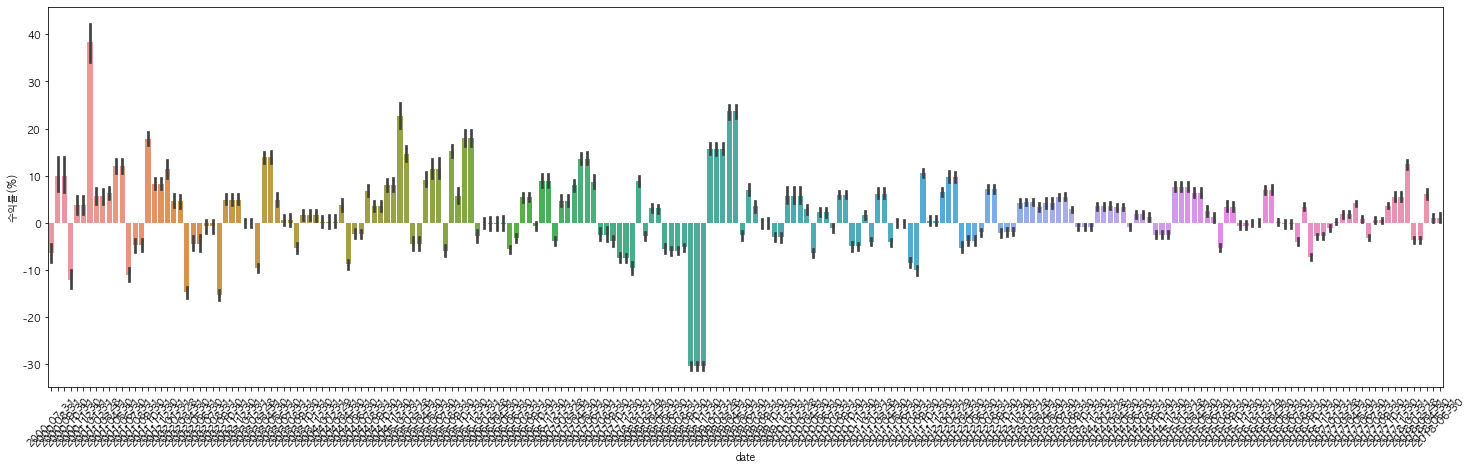

In [260]:
# seaborn version -> 자동으로 aggregation을 진행하고 평균과 편차를 표시한다.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 7))
ax = sns.barplot(data=df, x='date', y='수익률(%)', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

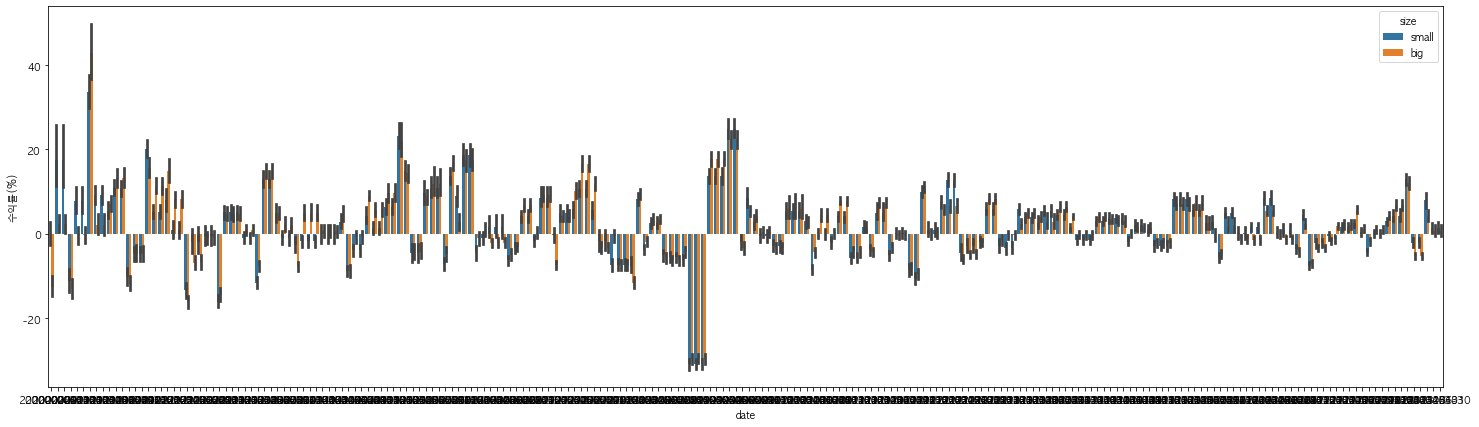

In [261]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 7))
ax = sns.barplot(data=df, x='date', y='수익률(%)', ax=ax, hue='size')

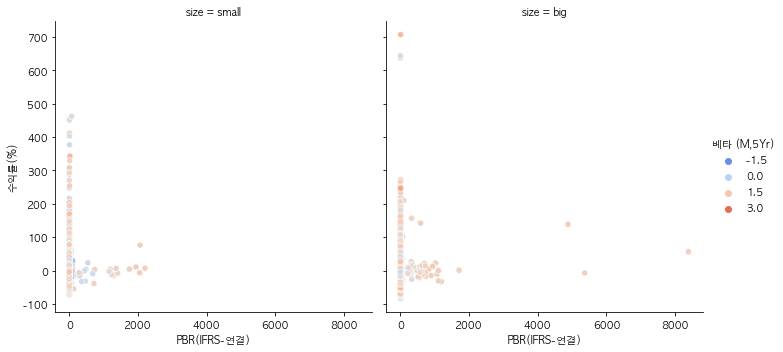

In [262]:
df = df.loc[df['date'] <= '2010-01-01']
sns.relplot(
    data=df,
    x='PBR(IFRS-연결)',
    y='수익률(%)',

    col='size',
    hue='베타 (M,5Yr)',
    palette='coolwarm'
)

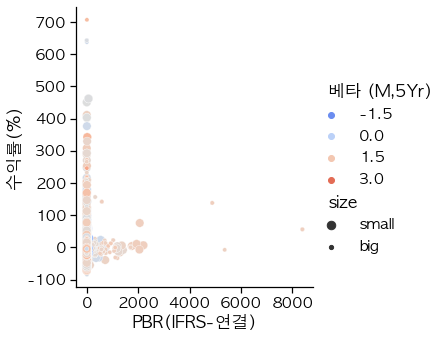

In [265]:
with sns.plotting_context('notebook', font_scale=1.4):
    sns.relplot(
        data=df,
        x='PBR(IFRS-연결)',
        y='수익률(%)',

        size='size',
        hue='베타 (M,5Yr)',
        palette='coolwarm'
    )

## Exercise

In [267]:
df_list = [pd.read_csv(f'{CSV_BASE_DIR}/naver_finance/{i}_12.csv') for i in range(2015, 2018)]
df = pd.concat(df_list)
df = df.dropna()
df['rtn'] = df['price2'] / df['price'] - 1
df

,ticker,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2,rtn
0,AK홀딩스,28071.4790,3.787,-1.334,-374.430630,-7.677,-1.421,15.1196,-3245.74120,43497.7230,211899.220,-19.47167,1.45295,0.29825,63200.0,56000.0,-0.113924
1,BGF,43342.8000,4.236,3.526,1528.412700,22.771,10.327,271.9567,3071.87160,15605.4570,87779.875,28.77862,5.66495,1.00711,44202.0,42140.0,-0.046649
3,BYC,1821.9598,11.598,7.222,131.581380,3.546,2.024,13.2353,15693.80800,453030.6200,216899.980,29.27907,1.01428,2.11849,459500.0,397000.0,-0.136017
4,CJ,211667.0800,5.789,2.604,5511.155300,5.874,2.365,5.8208,5780.62600,110304.5600,594563.900,40.94442,2.14574,0.39808,236684.0,176334.0,-0.254981
5,CJ CGV,11935.1640,5.605,4.374,521.992400,12.937,3.906,6.5241,2454.66380,19898.5310,56400.867,51.33086,6.33213,2.23401,126000.0,70400.0,-0.441270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,휴니드테크놀러지스,1808.5358,9.295,9.719,175.776150,17.422,11.540,12.7322,1248.42330,7953.3086,12844.851,9.13152,1.43337,0.88752,11400.0,8000.0,-0.298246
676,휴비스,11982.7080,2.216,1.933,231.640670,5.642,2.553,3.7397,649.24200,12201.4310,34732.490,15.55660,0.82777,0.29079,10100.0,7510.0,-0.256436
677,휴스틸,6905.6743,3.290,0.534,36.853638,0.966,0.592,2.3248,532.67346,54479.7900,99812.930,29.00464,0.28359,0.15479,15450.0,11550.0,-0.252427
678,휴켐스,7157.6494,21.324,15.376,1100.565800,21.302,13.500,41.4104,2798.31270,15161.2240,17509.533,8.77314,1.61926,1.40209,24550.0,24100.0,-0.018330


In [268]:
# 비정상적인 데이터를 거르는 작업
# 튀는 종목은 제거하고 정규분포 상 가운데 있는 종목들로 추세를 보기 위함
for col in df.columns:
    if col not in ['ticker', 'price2', 'price', 'rtn']:
        mu = df[col].mean()
        std = df[col].std()

        cond_1 = mu - 2 * std <= df[col]
        cond_2 = df[col] <= mu + 2 * std

        df = df[cond_1 & cond_2]

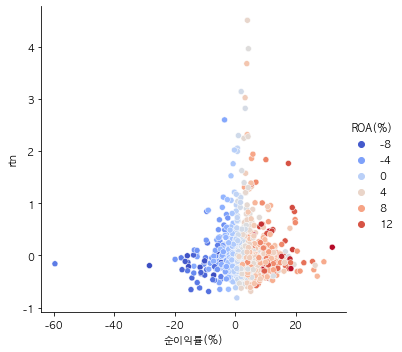

In [270]:
sns.relplot(
    x='순이익률(%)',
    y='rtn',
    hue='ROA(%)',
    palette='coolwarm',
    data=df
)

# 순이익률이 0에 가까울수록 수익률이 큰 경향이 있다 ?!!

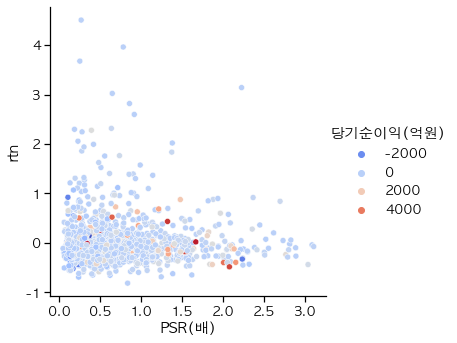

In [273]:
with sns.plotting_context('notebook', font_scale=1.2):
    sns.relplot(
        x='PSR(배)',
        y='rtn',
        hue='당기순이익(억원)',
        palette='coolwarm',
        data=df
    )

# 당기순이익이 큰 종목들 중에서 PSR이 작을수록 수익률이 큰 경향이 있다 ?!!